In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import os

path = os.getcwd()

In [2]:
#flood risk zone https://data.london.gov.uk/dataset/flood-risk-zones
flood_risk = gpd.read_file(path + '/Data/RoFRS_London/RoFRS_London.shp')
flood_risk

,OBJECTID,PROB_4BAND,SUITABILIT,PUB_DATE,SHAPE_Leng,SHAPE_Area,geometry
0,51657,High,County to Town,20180328,154.684691,223.985278,"POLYGON ((533783.154 158782.957, 533783.149 15..."
1,51662,High,County to Town,20180328,27.586314,23.741519,"POLYGON ((533777.986 158805.000, 533775.000 15..."
2,51890,High,County to Town,20180328,1304.269103,3885.963947,"POLYGON ((533173.590 159630.000, 533170.350 15..."
3,51936,High,County to Town,20180328,382.747355,701.640792,"POLYGON ((533155.000 159663.871, 533155.000 15..."
4,51937,High,County to Town,20180328,13.698716,7.911297,"POLYGON ((533015.000 159776.440, 533010.556 15..."
...,...,...,...,...,...,...,...
17218,1270196,Very Low,Town to Street,20180328,3718.106019,134032.404292,"POLYGON ((537600.000 199185.854, 537600.000 19..."
17219,1270200,Very Low,Town to Street,20180328,2558.957375,56558.336629,"POLYGON ((537650.000 199434.633, 537650.000 19..."
17220,1270201,Very Low,Town to Street,20180328,99.845313,124.410861,"POLYGON ((537550.000 199558.086, 537546.960 19..."
17221,1270202,Very Low,Town to Street,20180328,1259.917295,36923.341337,"POLYGON ((537450.000 199119.375, 537450.000 19..."


In [3]:
risk1 = flood_risk.to_crs('epsg:4326')
risk1.head()

,OBJECTID,PROB_4BAND,SUITABILIT,PUB_DATE,SHAPE_Leng,SHAPE_Area,geometry
0,51657,High,County to Town,20180328,154.684691,223.985278,"POLYGON ((-0.08187 51.31244, -0.08187 51.31244..."
1,51662,High,County to Town,20180328,27.586314,23.741519,"POLYGON ((-0.08194 51.31264, -0.08198 51.31264..."
2,51890,High,County to Town,20180328,1304.269103,3885.963947,"POLYGON ((-0.09030 51.32020, -0.09035 51.32012..."
3,51936,High,County to Town,20180328,382.747355,701.640792,"POLYGON ((-0.09055 51.32050, -0.09055 51.32047..."
4,51937,High,County to Town,20180328,13.698716,7.911297,"POLYGON ((-0.09252 51.32155, -0.09258 51.32158..."


<AxesSubplot:>

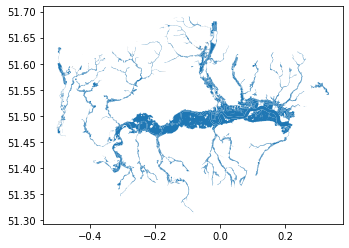

In [4]:
risk1.plot()

In [6]:
flood_risk['PROB_4BAND'].unique()

array(['High', 'Low', 'Medium', 'Very Low'], dtype=object)

In [7]:
boros = gpd.read_file('https://github.com/jreades/i2p/blob/master/data/src/Boroughs.gpkg?raw=true')
boros

/opt/conda/envs/sds2021/lib/python3.9/site-packages/geopandas/geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,"MULTIPOLYGON (((516401.600 160201.800, 516407...."
1,Croydon,E09000008,8649.441,0.000,F,"MULTIPOLYGON (((535009.200 159504.700, 535005...."
2,Bromley,E09000006,15013.487,0.000,F,"MULTIPOLYGON (((540373.600 157530.400, 540361...."
3,Hounslow,E09000018,5658.541,60.755,F,"MULTIPOLYGON (((521975.800 178100.000, 521967...."
4,Ealing,E09000009,5554.428,0.000,F,"MULTIPOLYGON (((510253.500 182881.600, 510249...."
5,Havering,E09000016,11445.735,210.763,F,"MULTIPOLYGON (((549893.900 181459.800, 549894...."
6,Hillingdon,E09000017,11570.063,0.000,F,"MULTIPOLYGON (((510599.800 191689.500, 510615...."
7,Harrow,E09000015,5046.330,0.000,F,"MULTIPOLYGON (((510599.800 191689.500, 510660...."
8,Brent,E09000005,4323.270,0.000,F,"MULTIPOLYGON (((525201.000 182512.600, 525181...."
9,Barnet,E09000003,8674.837,0.000,F,"MULTIPOLYGON (((524579.900 198355.200, 524594...."


In [8]:
boros_WCH = boros[(boros["NAME"] == "Westminster")|(boros["NAME"] == "Camden")|(boros["NAME"] == "Hackney")]

<AxesSubplot:>

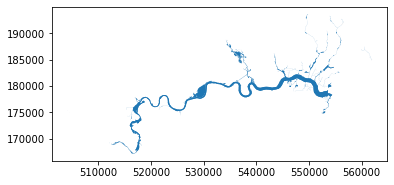

In [17]:
roi = gpd.sjoin(flood_risk, boros_WCH, op='intersects', how='inner')
roi.plot()

In [10]:
roi = roi.copy().reset_index()

In [11]:
len(roi)

244

In [12]:
roi.PROB_4BAND.value_counts()

Very Low    94
Low         80
Medium      42
High        28
Name: PROB_4BAND, dtype: int64

In [13]:
roi.NAME.value_counts()

Hackney        236
Westminster      8
Name: NAME, dtype: int64

In [14]:
roi.head()

,index,OBJECTID,PROB_4BAND,SUITABILIT,PUB_DATE,SHAPE_Leng,SHAPE_Area,geometry,index_right,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER
0,633,57156,High,County to Town,20180328,5.877769e+01,1.708703e+01,"POLYGON ((530532.800 180503.223, 530531.133 18...",24,Westminster,E09000033,2203.005,54.308,T
1,639,57165,High,County to Town,20180328,1.161662e+02,9.959291e+01,"POLYGON ((530549.550 180520.450, 530546.998 18...",24,Westminster,E09000033,2203.005,54.308,T
2,1465,75807,High,County to Town,20180328,3.097509e+06,1.216697e+08,"MULTIPOLYGON (((512546.347 169000.000, 512533....",24,Westminster,E09000033,2203.005,54.308,T
3,16317,1247190,Very Low,County to Town,20180328,1.708762e+01,1.350790e+00,"POLYGON ((530239.188 178630.543, 530241.762 17...",24,Westminster,E09000033,2203.005,54.308,T
4,16340,1247225,Very Low,County to Town,20180328,1.639336e+01,2.205541e-01,"POLYGON ((530330.605 179727.626, 530330.560 17...",24,Westminster,E09000033,2203.005,54.308,T


<AxesSubplot:>

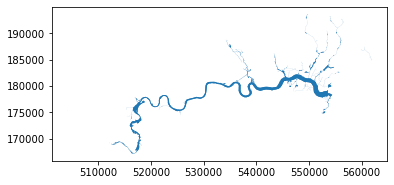

In [15]:
roi[roi['PROB_4BAND'] == 'High'].plot()

In [18]:
roi1 = roi.to_crs('epsg:4326')

In [19]:
from shapely.geometry import Polygon, mapping

In [20]:
roi2 = roi1[['PROB_4BAND', 'geometry']]

In [21]:
#can change into a function
newdf = []
a = 0
for i in range((len(roi2))):
    if mapping(roi2.iloc[i]['geometry'])['type'] == 'Polygon':
        dic = {}
        dic['i'] = a
        dic['risk'] = roi2.iloc[i]['PROB_4BAND']
        dic['coords'] = mapping(roi2.iloc[i]['geometry'])['coordinates'][0]
        newdf.append(dic)
        a += 1
    elif mapping(roi2.iloc[i]['geometry'])['type'] == 'MultiPolygon':
        for j in range(len(mapping(roi2.iloc[i]['geometry'])['coordinates'])):
            dic = {}
            dic['i'] = a
            dic['risk'] = roi2.iloc[i]['PROB_4BAND']
            dic['coords'] = mapping(roi2.iloc[i]['geometry'])['coordinates'][j][0]
            newdf.append(dic)
            a += 1

In [22]:
newdf1 = pd.DataFrame(newdf)
newdf1

,i,risk,coords
0,0,High,"((-0.12049572018230482, 51.50839040707156), (-..."
1,1,High,"((-0.12024812358399788, 51.50854135519672), (-..."
2,2,High,"((-0.3832065122556164, 51.40886525484509), (-0..."
3,3,High,"((-0.38819203476703584, 51.41054949737522), (-..."
4,4,High,"((0.1935428418076052, 51.45179270284054), (0.1..."
...,...,...,...
307,307,Very Low,"((-0.05635816586662137, 51.57050413248091), (-..."
308,308,Very Low,"((-0.058706083480294935, 51.572550982339315), ..."
309,309,Very Low,"((-0.061316216784152625, 51.572679555248286), ..."
310,310,Very Low,"((-0.062002666649276166, 51.573504771272404), ..."


In [24]:
newdf1.to_json('riskzone.json', orient='records')

In [23]:
def isPointInPoly(point, vs):
    x = point[1] # long of the point
    y = point[0] # lat of the point
    
    status = False
    i = 0; j = len(vs) - 1; 
    while (i < len(vs)):
        xi = vs[i][0]
        yi = vs[i][1]
        xj = vs[j][0]
        yj = vs[j][1]
        
        i += 1
        j = i - 1
        
        intersect = ((yi > y) != (yj > y)) and (x < ((xj - xi) * (y - yi) / (yj - yi) + xi))
        if (intersect):
            status = not status
        
    return status
    
#https://stackoverflow.com/questions/22521982/check-if-point-is-inside-a-polygon

In [25]:
pt = [-0.12463620394022873, 51.502103379325824]
polygon = [[51.50364609836737, -0.1271574786867547],
           [51.499892726267404, -0.12831619297071833],
          [51.499785864172985, -0.11900356335515884],
          [51.50393994363269, -0.11756589933616693]]

print(isPointInPoly(pt, polygon))

True


In [27]:
pt2 = (0.21326636600044127, 51.53311324002795)
init_stat = False
for i in range(len(newdf1['coords'])):    
    if isPointInPoly(pt2, newdf1['coords'][i]) == True:
        init_stat = True
        print(newdf1['risk'][i])
    else:
        pass

print(init_stat)

False


In [32]:
index = 0
def isPointInMultiPoly(pt, polys):
    init_stat = False   
    for i in range(len(polys)):
        if isPointInPoly(pt, polys.coords[i]) == True:
            init_stat = True
            if polys.risk[i] == 'Very Low':
                index = 1
            elif polys.risk[i] == 'Low':
                index = 2
            elif polys.risk[i] == 'Medium':
                index = 3
            elif polys.risk[i] == 'High':
                index = 4
        else: 
            pass
    return init_stat                

In [33]:
print(isPointInMultiPoly(pt2, newdf1))

False


In [34]:
print(index)

0
